# Deep_Learning_from_Scratch_1 - part1

#### 딥러닝의 기본적인 내용을 정리하였습니다. 밑바닥부터 시작하는 딥러닝(사이토 고키 지음)을 참고하였습니다. 

## 2. 퍼셉트론
#### - 퍼셉트론(perceptron)은 신경망(딥러닝)의 기원이 되는 알고리즘이다. 퍼셉트론의 구조를 배우는 것은 신경망과 딥러닝으로 나아가는 데 중요한 아이디어를 배우는 일이된다.
### 2.1 퍼셉트론이란?
#### - 퍼셉트론은 다수의 신호를 입력으로 받아 하나의 신호를 출력한다.
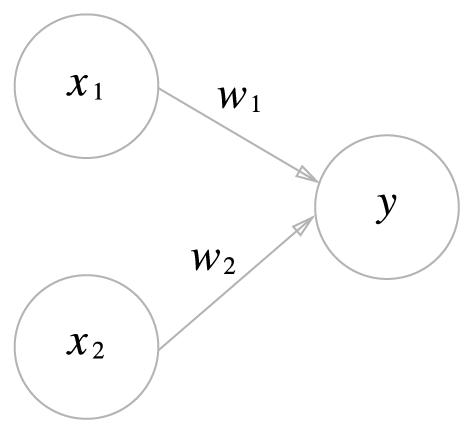
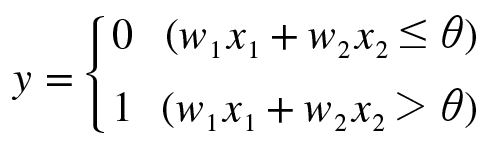
### 2.2 단순한 논리 회로 
#### 2.2.1 AND 게이트 
#### - AND 게이트는 두 입력이 모두 1일때만 1을 출력하고, 그 외에는 0을 출력한다.
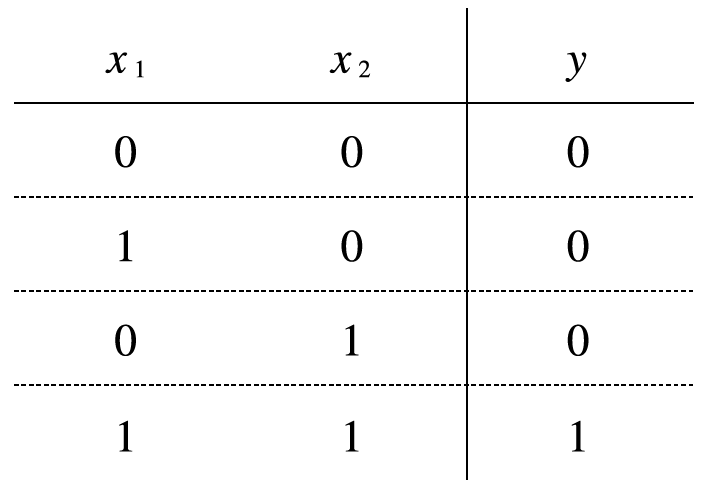
#### 2.2.2 NAND 게이트와 OR 게이트
#### - NAND는 Not AND를 의미한다. 즉, 입력이 모두 1일때는 0을 출력하고 그 외에는 1을 출력한다. 
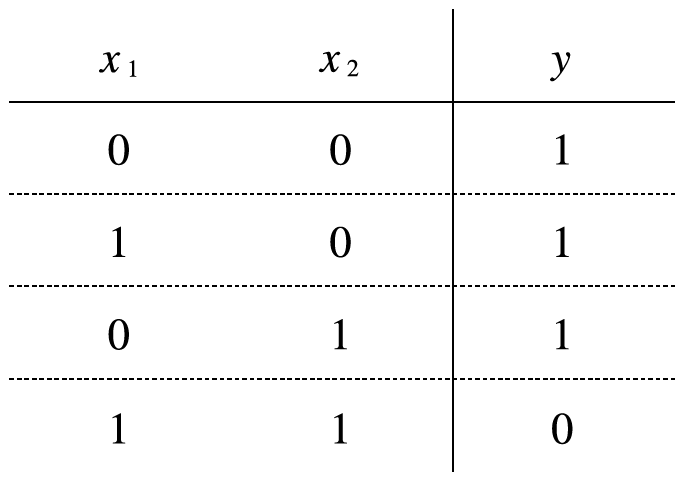
#### - OR 게이트는 입력 신호 중 하나 이상이 1이면 출력이 1이된다.
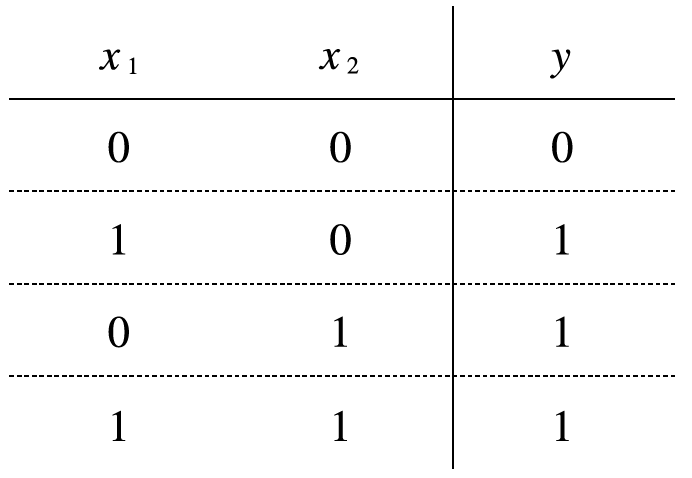
#### - 세 가지 게이트의 퍼셉트론 구조는 모두 동일하지만 매개변수(가중치, 임계값)은 차이가 있다. 
### 2.3 퍼셉트론 구현하기 
#### 2.3.1 간단한 구현부터 

In [1]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1
    
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


#### 2.3.2 가중치와 편향 도입
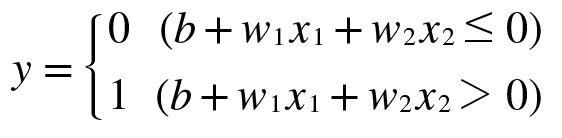

In [2]:
import numpy as np
x = np.array([0,1]) # 입력
w = np.array([0.5, 0.5]) # 가중치
b = -0.7 #편향
print(w * x)
print(np.sum(w*x))
print(np.sum(w*x) + b)

[0.  0.5]
0.5
-0.19999999999999996


#### 2.3.3 가중치와 편향 구현하기

In [3]:
def AND(x1, x2):
    x = np.array([x1,x2]) # 입력
    w = np.array([0.5, 0.5]) # 가중치
    b = -0.7 #편향
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1
    

#### - 가중치는 각 입력 신호가 결과에 주는 영향력(중요도)를 조절하는 매개변수이고, 편향은 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수이다.

In [4]:
def NAND(x1, x2):
    x = np.array([x1,x2]) # 입력
    w = np.array([-0.5, -0.5]) # 가중치
    b = 0.7 #편향
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def OR(x1, x2):
    x = np.array([x1,x2]) # 입력
    w = np.array([0.5, 0.5]) # 가중치
    b = -0.2 #편향
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

### 2.4 퍼셉트론의 한계
#### 2.4.1 XOR 게이트 
#### - XOR 게이트는 배타적 논리합이라는 논리회로이다. 입력 중 한쪽이 1일 때만 1을 출력한다.
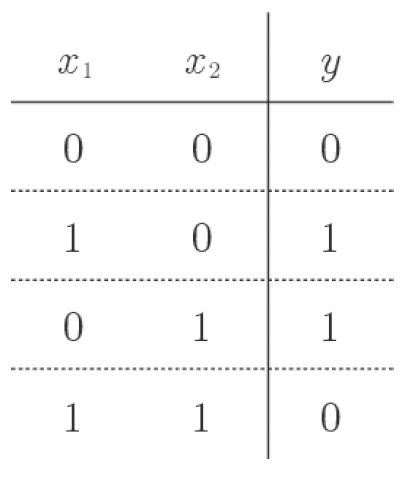
#### - 지금까지의 퍼셉트론으로는 XOR 게이트를 구현할 수 없다. 
#### 2.4.2 선형과 비선형
#### - 퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있다는 한계가 존재

### 2.5 다층 퍼셉트론
#### - 퍼셉트론으로는 XOR 게이트를 표현할 수 없다. 하지만 퍼셉트론의 층을 쌓은 다층 퍼셉트론을 활용한다면 XOR 게이트를 표현할 수 있다. 

#### 2.5.1 기존 게이트 조합
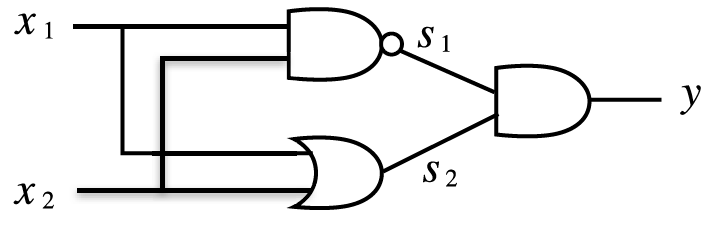
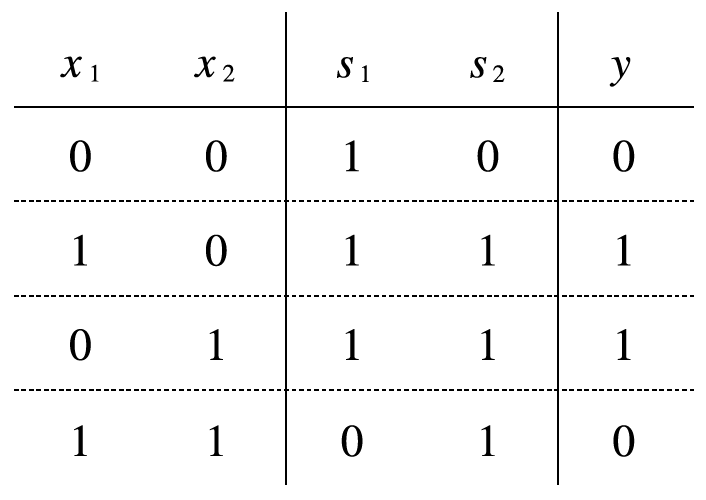
#### 2.5.2 XOR 게이트 구현하기

In [5]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    
    return y

print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0


#### - XOR은 2층 퍼셉트론이다. 그 외 게이트들은 모두 1층(단층) 퍼셉트론이다.

### 2.6 NAND에서 컴퓨터까지
#### - 이론상 2층 퍼셉트론이면 컴퓨터를 만들 수 있다.